# Predicting long short of stocks by indicators resonance
- Author: Li-Chun Huang
- 

In [61]:
import pandas as pd
import numpy as np
import stockstats as ss
import time
import yfinance as yf
import talib as ta

In [62]:
target_id = 'AAPL'
start_date = "2015-01-01"
end_date = "2021-12-31"
test_date = '2021'
day_length = 1
time_period = 5

In [63]:
target = yf.download(target_id, start=start_date, end=end_date, interval="1d")
Indicator = pd.DataFrame(index=target.index)
Det_Indicator = pd.DataFrame(index=target.index)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:>

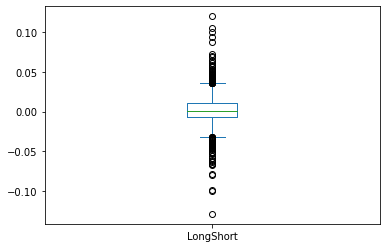

In [64]:
target.columns = target.columns.map({
'Open':'open',
'High':'high',
'Low':'low',
'Adj Close':'adj close',
'Volume':'volume',
'Close':'close'
})
target['LongShort'] = target['close'].shift(-day_length)
num_label = pd.DataFrame(index=target.index)
num_label['LongShort'] = (target['LongShort']-target['close'])/target['close']
num_label.plot.box()

In [65]:
from talib.abstract import STOCH as KD
KD_ = KD(target,time_period).dropna()
print(KD_)
KD_shift = KD_.shift(1)
print(KD_shift)
KD_['LongShort'] = (KD_['slowk']-KD_['slowd'])


Indicator['KD_k'] = KD_['slowk']
Indicator['KD_d'] = KD_['slowd']
Det_Indicator['KD_k'] = KD_['slowk']>KD_shift['slowk']
Det_Indicator['KD_d'] = KD_['slowd']>KD_shift['slowd']

                slowk      slowd
Date                            
2015-01-13  64.317226  71.952079
2015-01-14  44.901762  62.601186
2015-01-15  27.845615  45.688201
2015-01-16  13.397029  28.714802
2015-01-20  19.712804  20.318483
...               ...        ...
2021-12-23  64.716308  42.214175
2021-12-27  84.343506  62.682051
2021-12-28  92.175847  80.411887
2021-12-29  87.118709  87.879354
2021-12-30  70.133426  83.142661

[1755 rows x 2 columns]
                slowk      slowd
Date                            
2015-01-13        NaN        NaN
2015-01-14  64.317226  71.952079
2015-01-15  44.901762  62.601186
2015-01-16  27.845615  45.688201
2015-01-20  13.397029  28.714802
...               ...        ...
2021-12-23  38.986338  25.271460
2021-12-27  64.716308  42.214175
2021-12-28  84.343506  62.682051
2021-12-29  92.175847  80.411887
2021-12-30  87.118709  87.879354

[1755 rows x 2 columns]


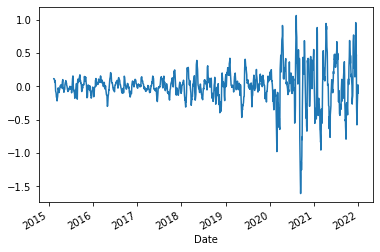

In [66]:
from talib.abstract import MACD
MACD_ = MACD(target,12,26,time_period)
MACD_ = MACD_.dropna()
MACD_shift = MACD_.shift(1)
MACD_['LongShort'] = MACD_['macdhist']>0
Indicator['MACD'] = MACD_['macd']
MACD_['macdhist'].plot()
Det_Indicator['MACD'] = MACD_['macd']>MACD_shift['macd']

In [67]:
from talib import SMA

SMA_ = pd.DataFrame(SMA(target['close'],time_period),columns=['SMA'])
SMA_ = SMA_.dropna()
SMA_['LongShort'] = (target['close']-SMA_['SMA'])/SMA_['SMA']
Indicator['SMA'] = SMA_['LongShort']
Det_Indicator['SMA'] = target.loc[SMA_.index,'close']>SMA_['SMA']


In [68]:
from talib import EMA

EMA_ = pd.DataFrame(EMA(target['close'],time_period),columns=['EMA'])
EMA_ = EMA_.dropna()
EMA_['LongShort'] = (target['close']-EMA_['EMA'])/EMA_['EMA']
Indicator['EMA'] = EMA_['LongShort']
Det_Indicator['EMA'] = target.loc[EMA_.index,'close']>EMA_['EMA']

In [69]:
from talib import WMA

WMA_ = pd.DataFrame(WMA(target['close'],time_period),columns=['WMA'])
WMA_  = WMA_.dropna()
WMA_['LongShort'] = (target['close']-WMA_['WMA'])/WMA_['WMA']
Indicator['WMA'] = WMA_['LongShort']
Det_Indicator['WMA'] = target.loc[WMA_.index,'close']>WMA_['WMA']

In [70]:
from talib import RSI
RSI_ = pd.DataFrame(RSI(target['close'],time_period),columns=['RSI'])
RSI_ = RSI_.dropna()
Indicator['RSI'] = RSI_['RSI']

RSI_shift = RSI_.shift(1)

Det_Indicator['RSI'] = False
RSI_['below30'] = RSI_['RSI']<30
RSI_['Increase'] = RSI_['RSI']>RSI_shift['RSI']

Det_Indicator['RSI'] = Det_Indicator['RSI']|RSI_['below30']|RSI_['Increase']

Det_Indicator['RSI'].value_counts()

True     1111
False     652
Name: RSI, dtype: int64

In [71]:
from talib import MOM
MOM_ = MOM(target['close'], timeperiod=time_period)
MOM_ = MOM_.dropna()

Indicator['MOM'] = MOM_
Det_Indicator['MOM'] = MOM_>0

In [72]:
from talib import CCI
CCI_ = pd.DataFrame(CCI(target['high'],target['low'],target['close'],time_period),columns=['CCI'])
CCI_=CCI_.dropna()

CCI_shift = CCI_.shift(1)

Indicator['CCI'] = CCI_
Det_Indicator['CCI'] = False
CCI_['below200'] = CCI_['CCI']<200
CCI_['Increase'] = CCI_['CCI']>CCI_shift['CCI']
Det_Indicator['CCI'] = Det_Indicator['CCI']|CCI_['Increase']|CCI_['below200'] 

In [73]:
from talib import WILLR
WILLR_ = WILLR(target['high'],target['low'],target['close'],time_period)
WILLR_=WILLR_.dropna()
WILLR_shift=WILLR_.shift(1) 
Indicator['WILLR'] = WILLR_
Det_Indicator['WILLR'] = WILLR_>WILLR_shift

In [74]:
from talib import AD
AD_ = AD(target['high'],target['low'],target['close'],target['volume'])
AD_shift = AD_.shift(1)
Det_Indicator['AD'] = AD_>AD_shift



In [75]:
five_days = pd.concat([Det_Indicator,pd.DataFrame(num_label['LongShort'])],axis=1)
five_days

five_days.dropna(inplace=True)
five_days

,KD_k,KD_d,MACD,SMA,EMA,WMA,RSI,MOM,CCI,WILLR,AD,LongShort
Date,,,,,,,,,,,,
2015-02-12,True,True,False,True,True,True,True,True,True,False,False,0.004903
2015-02-13,False,True,True,True,True,True,True,True,True,True,True,0.005902
2015-02-17,False,True,True,True,True,True,True,True,True,False,False,0.006962
2015-02-18,True,False,True,True,True,True,True,True,True,True,True,-0.002098
2015-02-19,False,False,True,True,True,True,False,True,True,False,False,0.008174
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,True,True,False,True,True,True,True,False,True,True,True,0.003644
2021-12-23,True,True,False,True,True,True,True,True,True,True,True,0.022975
2021-12-27,True,True,True,True,True,True,True,True,True,True,True,-0.005767


In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score
def get_performance(true,pred,out=False):
    matrix = confusion_matrix(true,pred,labels=[True,False])
    result = {
    'acc':accuracy_score(true,pred),
    'win_rate':matrix[0][0]/(matrix[0][0]+matrix[1][0]),
    'precision':precision_score(true,pred),
    'recall':recall_score(true,pred)
    }
    return result

In [77]:
from sklearn.model_selection import train_test_split


X = five_days.iloc[:,:-1]
y = five_days['LongShort']>0

X_train = X[five_days.index<test_date]
X_test = X[five_days.index>=test_date]
y_train = y[five_days.index<test_date]
y_test = y[five_days.index>=test_date]

In [78]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV
clf = RFC(random_state=42,n_jobs=5)

parameters = {
    'n_estimators': np.arange(10, 210, 10).tolist(),
    
    
    }

GS = GridSearchCV(clf, parameters,n_jobs=5)
GS.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=5, random_state=42),
             n_jobs=5,
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200]})

In [79]:
from sklearn.ensemble import RandomForestClassifier
clf =  RandomForestClassifier(**GS.best_params_,n_jobs=5,random_state=42)
clf.fit(X_train,y_train)
result = clf.predict(X_test)

print(get_performance(y_test,result))
print(confusion_matrix(y_test,result,labels=[True,False]))
y_test.value_counts()

print(np.average(five_days.loc[:,'LongShort']))
print(np.average(five_days.loc[y_test[result].index,'LongShort']))

print(np.average(five_days.loc[y_test[np.array(y_test) & result ].index,'LongShort']))
print(np.average(five_days.loc[y_test[~np.array(y_test) & result ].index,'LongShort']))

{'acc': 0.54, 'win_rate': 0.558282208588957, 'precision': 0.558282208588957, 'recall': 0.6791044776119403}
[[91 43]
 [72 44]]
0.0011651024904823575
0.0025410863333598164
0.01275526809104241
-0.010368504499266797


Final reward: LongShort    1.48535
Name: 2021-12-29 00:00:00, dtype: float64
Stock grow: 1.3770187149791286


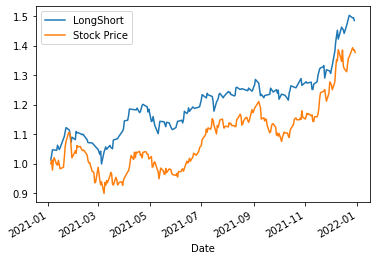

In [80]:
import matplotlib.pyplot as plt

earn =np.log(pd.DataFrame(five_days.loc[y_test[result].index,'LongShort'])+1)

earn = earn.cumsum()

earn =np.exp(earn) 
earn.plot()


price_reward =  target[target.index>=test_date]['close'].copy()
price_reward/=price_reward[0]

price_reward.plot(label='Stock Price')
plt.legend()
print('Final reward:',earn.iloc[-1])
print('Stock grow:',price_reward.iloc[-1])